## New Zealand Covid-19 vaccination rate in 2021

### Group Project

kya31(79448199)

In [1]:
library(tidyverse)
library(dplyr)
library(tidytext)
library(textdata)
library(rvest)
library(xml2)
library(magrittr) 
library(purrr)
library(glue) 
library(stringr) 
library(ggplot2)
library(visdat)
suppressWarnings(library(tidyverse))
library(readxl)
library(lubridate)
library(sp)
# library(maptools)
# install.packages("rgeos")
# install.packages("maps")
library(maps)
library(rgeos)
# install.packages("sf")
# library(sf)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map


rgeos version: 0.5-9, (SVN revision 684)
 GEOS runtime version: 3.8.0-CAPI-1.13.1 
 Please note that rgeos will be retire

In [2]:
options(repr.plot.width=15, repr.plot.height=8)

In [3]:
#read vaccine data
vaccine_data <- read_csv('../Data/doses_group_and_dhb_service.csv', show_col_types = FALSE)
colnames(vaccine_data)[1] <- "weekly_date"
colnames(vaccine_data)[3] <- "service"
colnames(vaccine_data)[5] <- "uptake_number"
vaccine_data %<>% select(c("weekly_date", "service", "uptake_number"))
vaccine_data %<>% 
        group_by(weekly_date, service) %>% 
        mutate(total_uptake_number = sum(uptake_number)) %>%
        select(-uptake_number) %>%
        ungroup() %>%
        distinct()
vaccine_data

weekly_date,service,total_uptake_number
<date>,<chr>,<dbl>
2021-02-21,Auckland Metro,162
2021-02-28,Auckland Metro,5354
2021-02-28,Canterbury,599
2021-02-28,Capital & Coast and Hutt Valley,180
2021-02-28,Lakes,72
2021-02-28,Northland,18
2021-02-28,Tairawhiti,79
2021-02-28,Waikato,218
2021-02-28,Hawke's Bay,26


In [4]:
# Read the dhb mapping

dhb_mapping_data <- read_csv('../Data/grouped_dhb_mapping.csv', show_col_types = FALSE)
colnames(dhb_mapping_data)[2] <- "service"
dhb_mapping_data %<>% group_by(service) %>% summarize(all_districts = paste(DHB, collapse = ", "))
dhb_mapping_data

service,all_districts
<chr>,<chr>
Auckland Metro,"Auckland, Counties Manukau, Waitemata"
Bay of Plenty,Bay of Plenty
Canterbury,Canterbury
Capital & Coast and Hutt Valley,"Capital and Coast, Hutt Valley"
Hawke's Bay,Hawke's Bay
Hawke’s Bay,Hawke’s Bay
Lakes,Lakes
MidCentral,MidCentral
Nelson Marlborough,Nelson Marlborough


In [5]:
vaccine_data2 <- vaccine_data %>% left_join(dhb_mapping_data, by="service")
vaccine_data2 %<>% select(-service)
vaccine_data2 %<>% na.omit()
vaccine_data2

weekly_date,total_uptake_number,all_districts
<date>,<dbl>,<chr>
2021-02-21,162,"Auckland, Counties Manukau, Waitemata"
2021-02-28,5354,"Auckland, Counties Manukau, Waitemata"
2021-02-28,599,Canterbury
2021-02-28,180,"Capital and Coast, Hutt Valley"
2021-02-28,72,Lakes
2021-02-28,18,Northland
2021-02-28,79,Tairawhiti
2021-02-28,218,Waikato
2021-02-28,26,Hawke's Bay


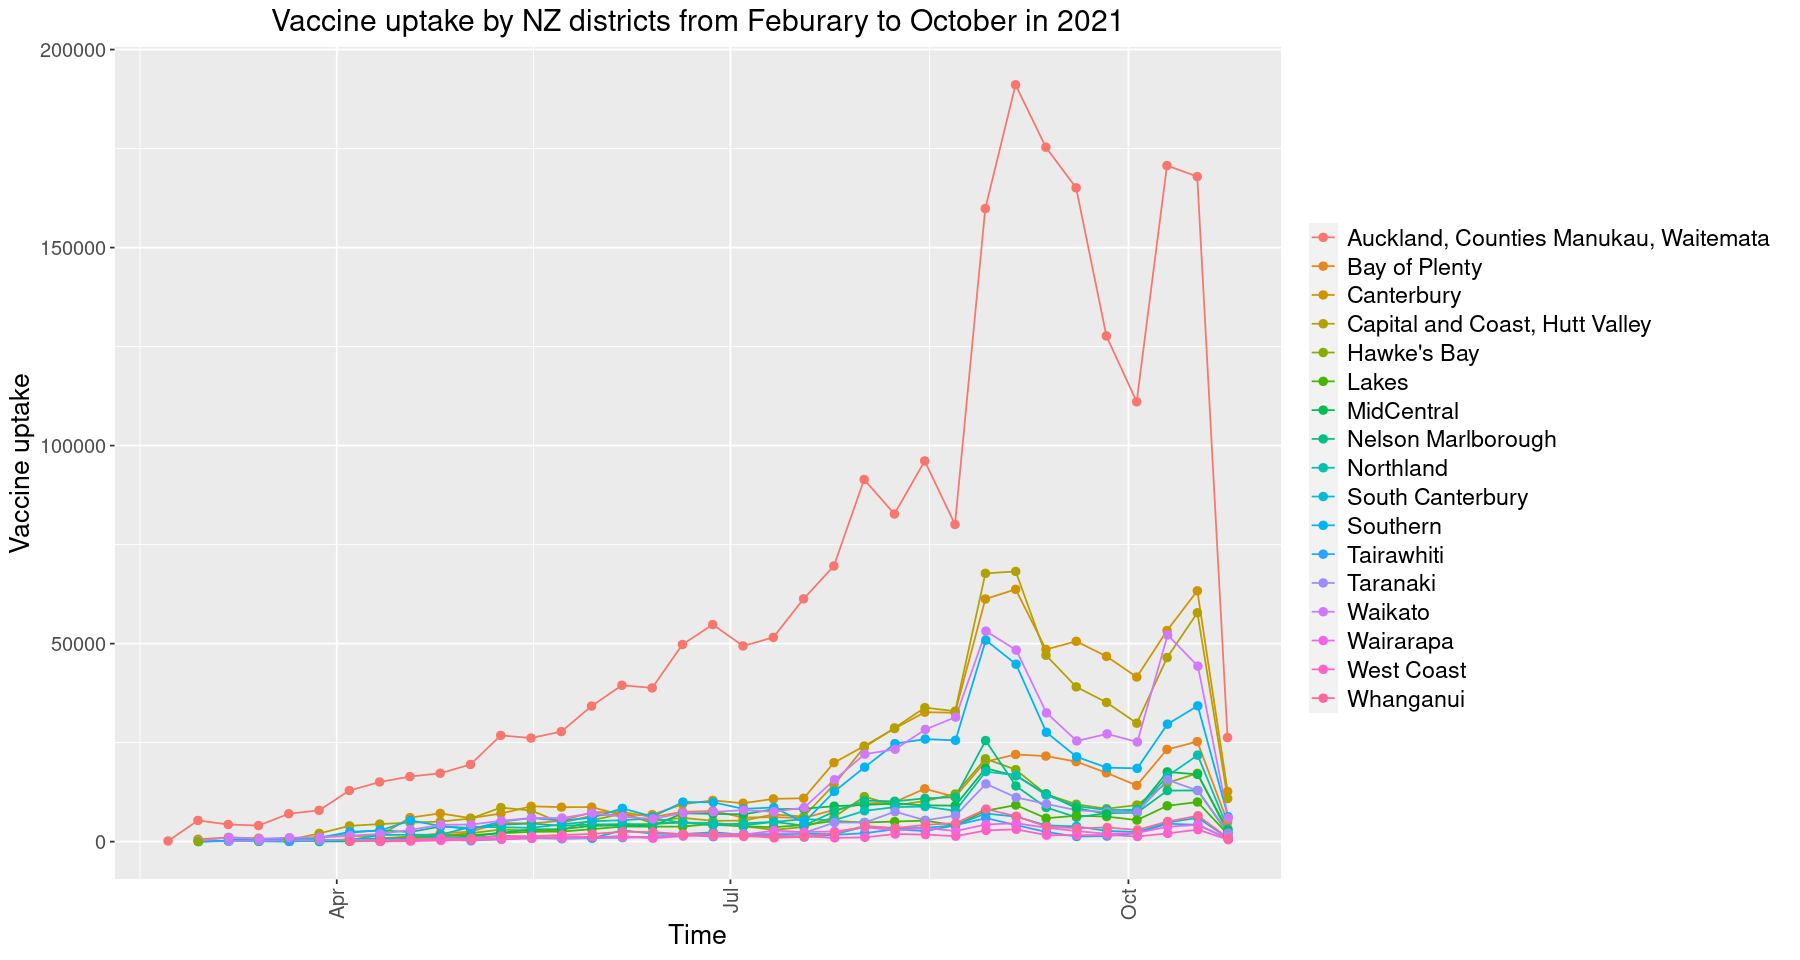

In [6]:
vaccine_graph_by_district <- vaccine_data2 %>% 
        ggplot(aes(x=weekly_date, y=total_uptake_number, color=all_districts, group=all_districts)) + 
        ggtitle('Vaccine uptake by NZ districts from Feburary to October in 2021') + 
        geom_line(position = position_dodge(0.2)) +
        geom_point(position = position_dodge(0.2), size=2) +
        # geom_text(aes(label=total_uptake_number), position=position_dodge(width=0.9), vjust=-0.75) +
        theme(plot.title = element_text(hjust = 0.5, size=18), 
              axis.title=element_text(size=16), 
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size=12),
              axis.text.y = element_text(size=12),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) + 
        xlab("Time") + ylab("Vaccine uptake")  
vaccine_graph_by_district

In [7]:
ggsave(filename = "Vaccine uptake by NZ districts from Feburary to October in 2021.png", vaccine_graph_by_district)

Saving 6.67 x 6.67 in image



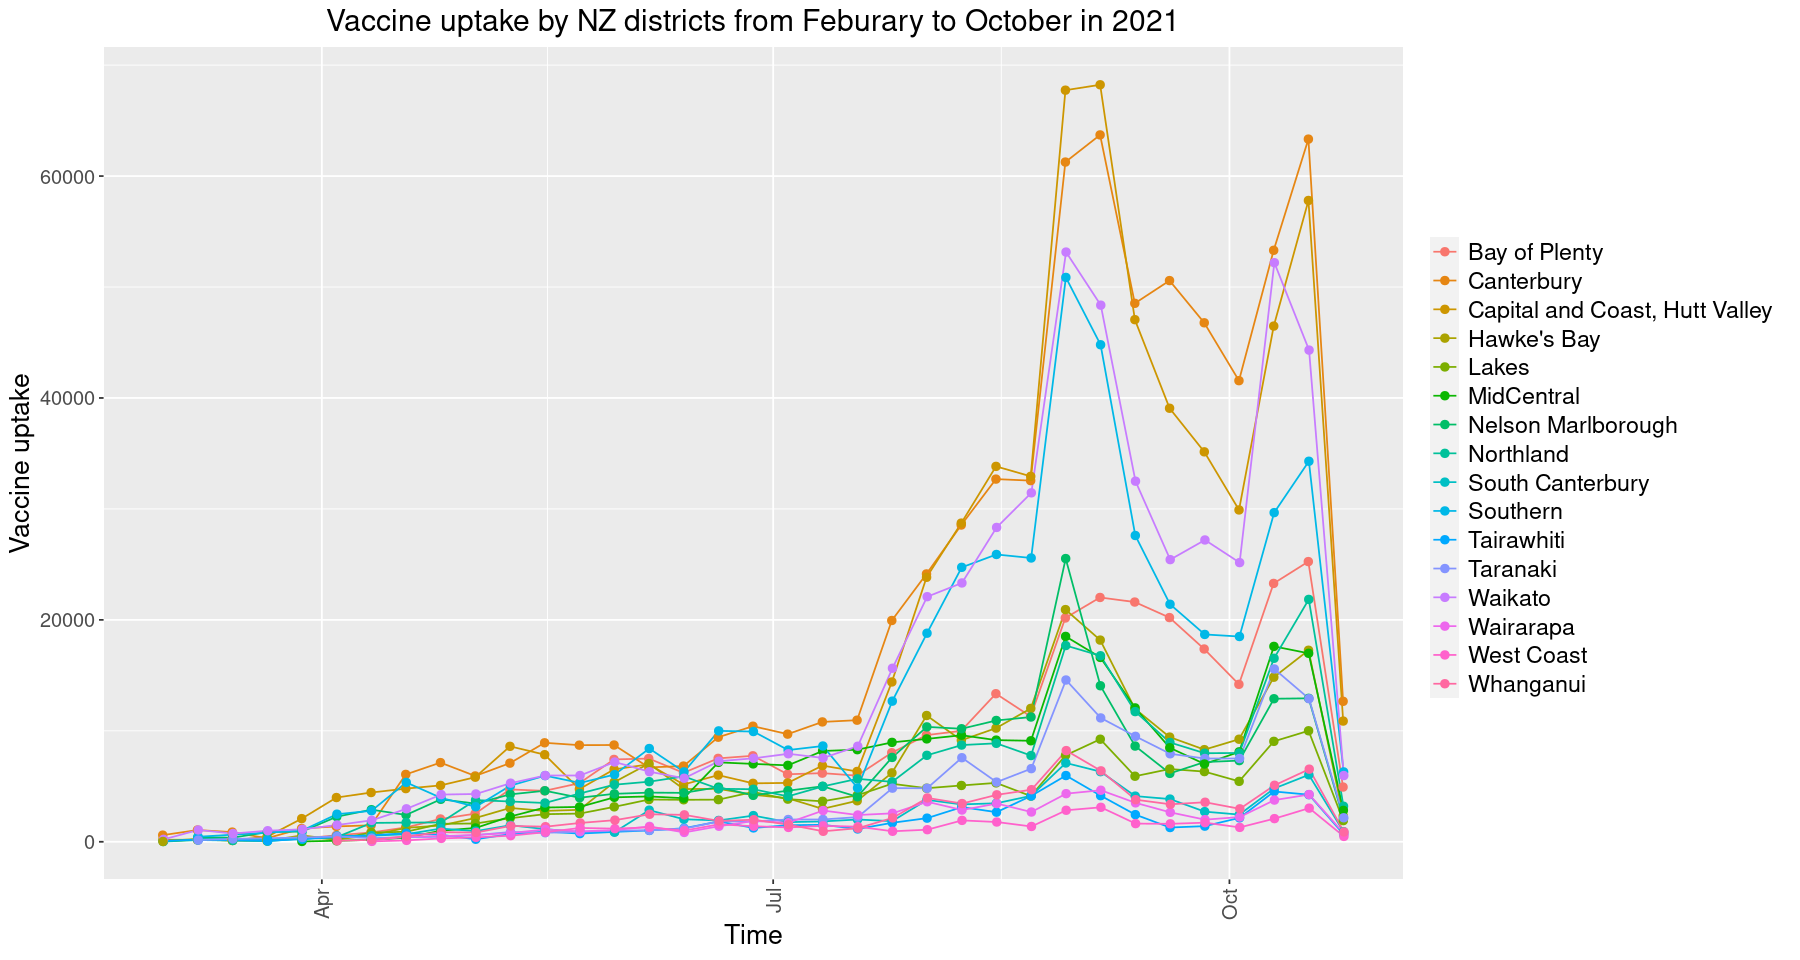

In [8]:
# The same graph but without Auckland, Counties Manukau and Waitemata
vaccine_graph_by_district1 <- vaccine_data2 %>% 
        filter(all_districts != "Auckland, Counties Manukau, Waitemata") %>%
        ggplot(aes(x=weekly_date, y=total_uptake_number, color=all_districts, group=all_districts)) + 
        ggtitle('Vaccine uptake by NZ districts from Feburary to October in 2021') + 
        geom_line(position = position_dodge(0.2)) +
        geom_point(position = position_dodge(0.2), size=2) +
        # geom_text(aes(label=total_uptake_number), position=position_dodge(width=0.9), vjust=-0.75) +
        theme(plot.title = element_text(hjust = 0.5, size=18), 
              axis.title=element_text(size=16), 
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size=12),
              axis.text.y = element_text(size=12),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) + 
        xlab("Time") + ylab("Vaccine uptake")
vaccine_graph_by_district1

In [9]:
# Test cases 
test_case_data <- read_xlsx('../Data/covid-cases-counts-location.xlsx')
colnames(test_case_data)[1] <- "date"
test_case_data$date <- as.Date(test_case_data$date)
test_case_data1 <- test_case_data %>% 
        mutate(week = cut.Date(date, breaks = "1 week", labels = FALSE)) %>% 
        arrange(date) %>%
        group_by(week) %>%
        summarise(WeeklyCases = sum(Cases), Week = max(date)) %>%
        select(Week, WeeklyCases)
test_case_data1 %<>% na.omit()
colnames(test_case_data1)[1] <- "weekly_date"
colnames(test_case_data1)[2] <- "weekly_total_cases"
test_case_data1


weekly_date,weekly_total_cases
<date>,<dbl>
2020-03-01,1
2020-03-08,6
2020-03-15,4
2020-03-22,121
2020-03-29,483
2020-04-05,506
2020-04-12,234
2020-04-19,87
2020-04-26,34


In [10]:
# merge them together 
vac_tes_table <- merge(vaccine_data2, test_case_data1, by="weekly_date")
vac_tes_table

weekly_date,total_uptake_number,all_districts,weekly_total_cases
<date>,<dbl>,<chr>,<dbl>
2021-02-21,162,"Auckland, Counties Manukau, Waitemata",18
2021-02-28,5354,"Auckland, Counties Manukau, Waitemata",24
2021-02-28,599,Canterbury,24
2021-02-28,180,"Capital and Coast, Hutt Valley",24
2021-02-28,72,Lakes,24
2021-02-28,18,Northland,24
2021-02-28,79,Tairawhiti,24
2021-02-28,218,Waikato,24
2021-02-28,26,Hawke's Bay,24


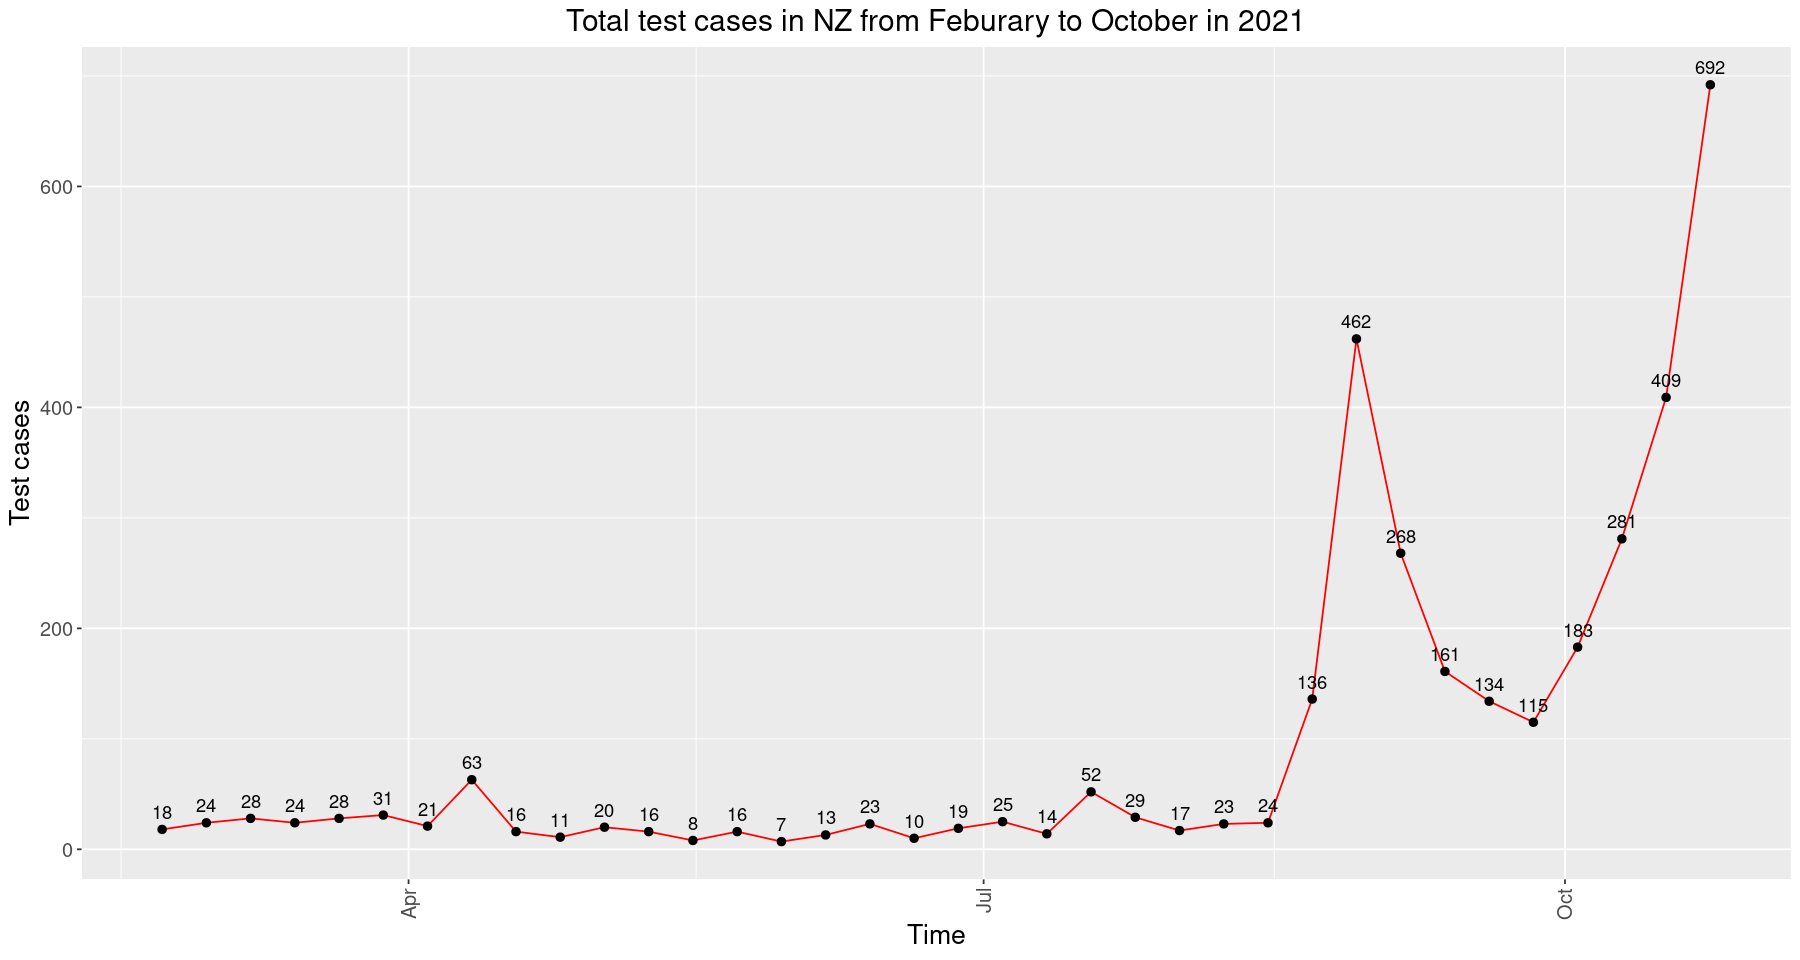

In [11]:
test_case_graph <- vac_tes_table %>%
        select(-c("all_districts", "total_uptake_number")) %>%
        distinct() %>%
        ggplot(aes(x=weekly_date, y=weekly_total_cases)) + 
        ggtitle('Total test cases in NZ from Feburary to October in 2021') + 
        geom_line(position = position_dodge(0.2), color="red") +
        geom_point(position = position_dodge(0.2), size=2) +
        geom_text(aes(label= weekly_total_cases), position=position_dodge(width=0.9), vjust=-0.75) +
        theme(plot.title = element_text(hjust = 0.5, size=18), 
              axis.title=element_text(size=16), 
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size=12),
              axis.text.y = element_text(size=12),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) + 
        xlab("Time") + ylab("Test cases")
test_case_graph

In [12]:
ggsave(filename = "Total test cases in NZ from Feburary to October in 2021.png", test_case_graph)

Saving 6.67 x 6.67 in image



In [13]:
death_data = read_csv("https://raw.githubusercontent.com/minhealthnz/nz-covid-data/main/cases/weekly-deaths.csv", show_col_types = FALSE)

In [14]:
colnames(death_data)[1] <- "weekly_date"
colnames(death_data)[2] <- "death_in_28_days"
colnames(death_data)[3] <- "death_attributable"

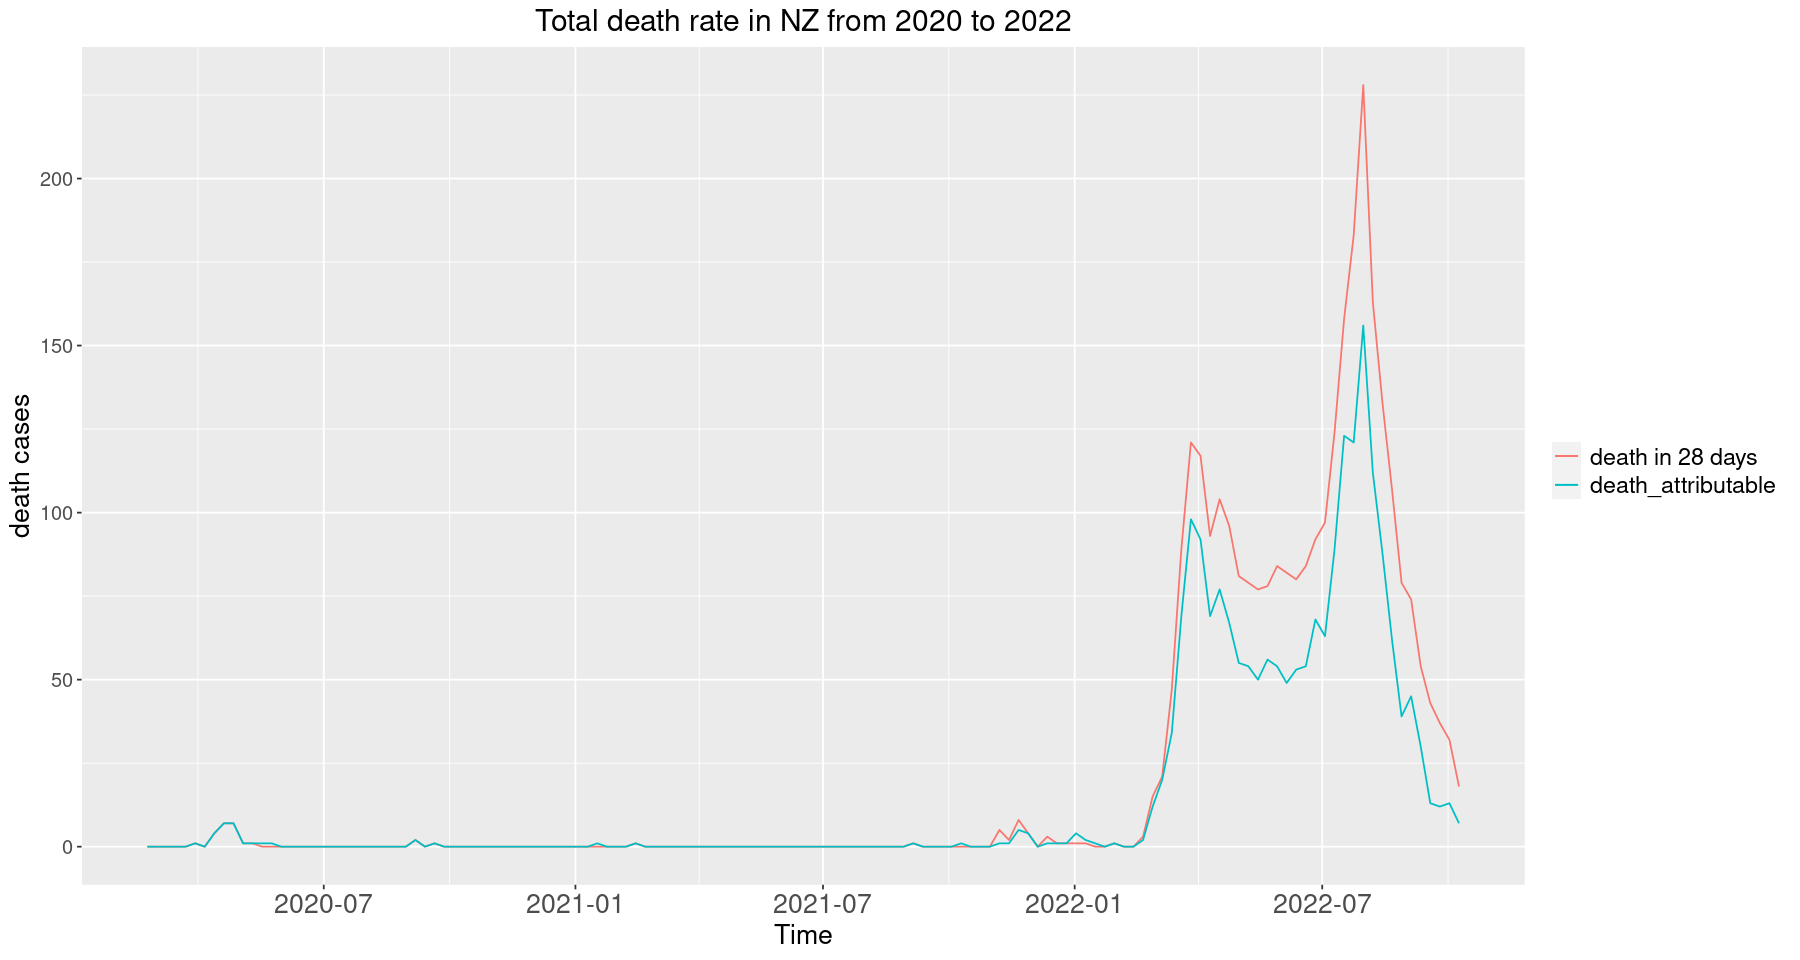

In [15]:
death_data_graph <- death_data %>%
        ggplot(aes(x=weekly_date)) + 
        ggtitle('Total death rate in NZ from 2020 to 2022') + 
        geom_line(aes(y=death_in_28_days, color="death in 28 days"),position = position_dodge(0.2)) +
        # geom_point(aes(y=death_in_28_days),position = position_dodge(0.2), size=2) +
        geom_line(aes(y=death_attributable, color="death_attributable"),position = position_dodge(0.2)) +
        # geom_point(aes(y=death_attributable),position = position_dodge(0.2), size=2) +
        # geom_text(aes(y=death_in_28_days, label= death_in_28_days), position=position_dodge(width=0.9), vjust=-0.75) +
        # geom_text(aes(y=death_attributable, label= death_attributable), position=position_dodge(width=0.9), vjust=-0.75) +
        theme(plot.title = element_text(hjust = 0.5, size=18), 
              axis.title=element_text(size=16), 
              axis.text.x = element_text(size=16),
              axis.text.y = element_text(size=12),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) + 
        xlab("Time") + ylab("death cases")
death_data_graph

In [16]:
ggsave(filename = "Total death rate in NZ from 2020 to 2022.png", death_data_graph)

Saving 6.67 x 6.67 in image



In [17]:
vac_tes_death_table <- merge(vac_tes_table, death_data, by="weekly_date")
vac_tes_death_table

weekly_date,total_uptake_number,all_districts,weekly_total_cases,death_in_28_days,death_attributable
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2021-02-21,162,"Auckland, Counties Manukau, Waitemata",18,0,0
2021-02-28,5354,"Auckland, Counties Manukau, Waitemata",24,0,0
2021-02-28,599,Canterbury,24,0,0
2021-02-28,180,"Capital and Coast, Hutt Valley",24,0,0
2021-02-28,72,Lakes,24,0,0
2021-02-28,18,Northland,24,0,0
2021-02-28,79,Tairawhiti,24,0,0
2021-02-28,218,Waikato,24,0,0
2021-02-28,26,Hawke's Bay,24,0,0


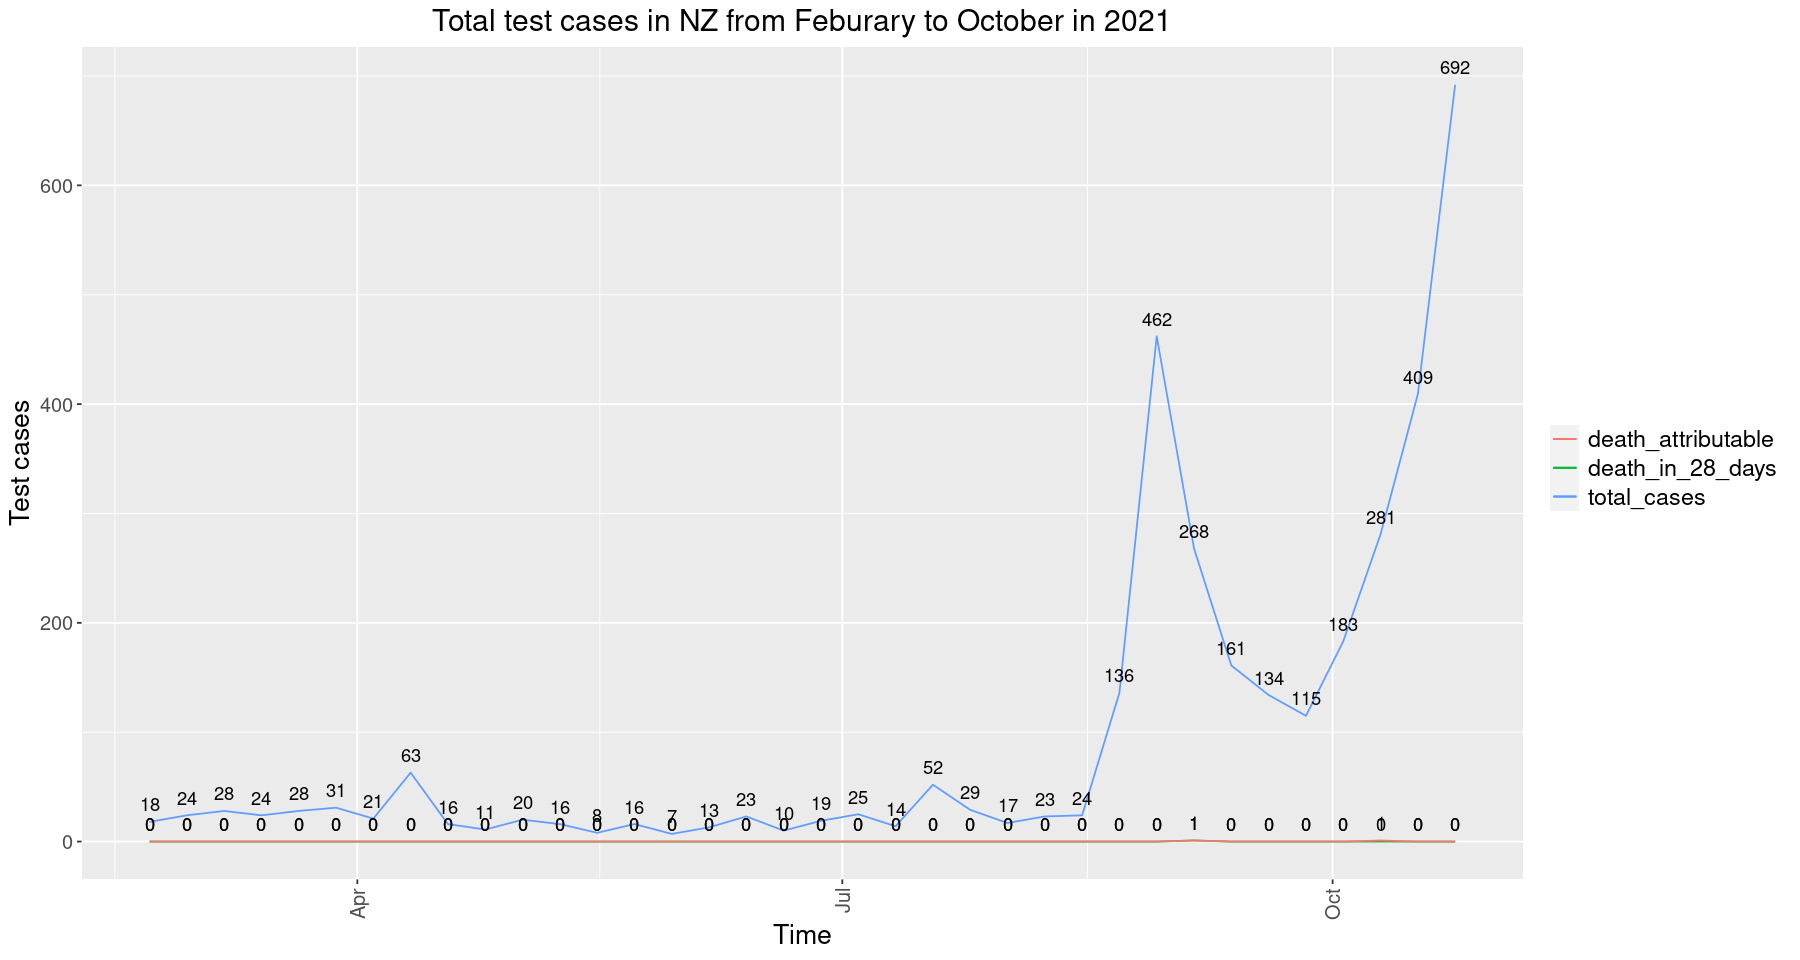

In [18]:
test_case_graph <- vac_tes_death_table %>%
        select(-c("all_districts", "total_uptake_number")) %>%
        distinct() %>%
        ggplot(aes(x=weekly_date)) + 
        ggtitle('Total test cases in NZ from Feburary to October in 2021') + 
        geom_line(aes(y=weekly_total_cases, color="total_cases"), position = position_dodge(0.2)) +
        # geom_point(position = position_dodge(0.2), size=2) +
        geom_line(aes(y=death_in_28_days, color="death_in_28_days"), position = position_dodge(0.2)) +
        # geom_point(position = position_dodge(0.2), size=2) +
        geom_line(aes(y=death_attributable, color="death_attributable"), position = position_dodge(0.2)) +
        # geom_point(position = position_dodge(0.2), size=2) +
        geom_text(aes(y=weekly_total_cases, label= weekly_total_cases), position=position_dodge(width=0.9), vjust=-0.75) +
        geom_text(aes(y=death_in_28_days, label= death_in_28_days), position=position_dodge(width=0.9), vjust=-0.75) +
        geom_text(aes(y=death_attributable, label= death_attributable), position=position_dodge(width=0.9), vjust=-0.75) +
        theme(plot.title = element_text(hjust = 0.5, size=18), 
              axis.title=element_text(size=16), 
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size=12),
              axis.text.y = element_text(size=12),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) + 
        xlab("Time") + ylab("Test cases")
test_case_graph

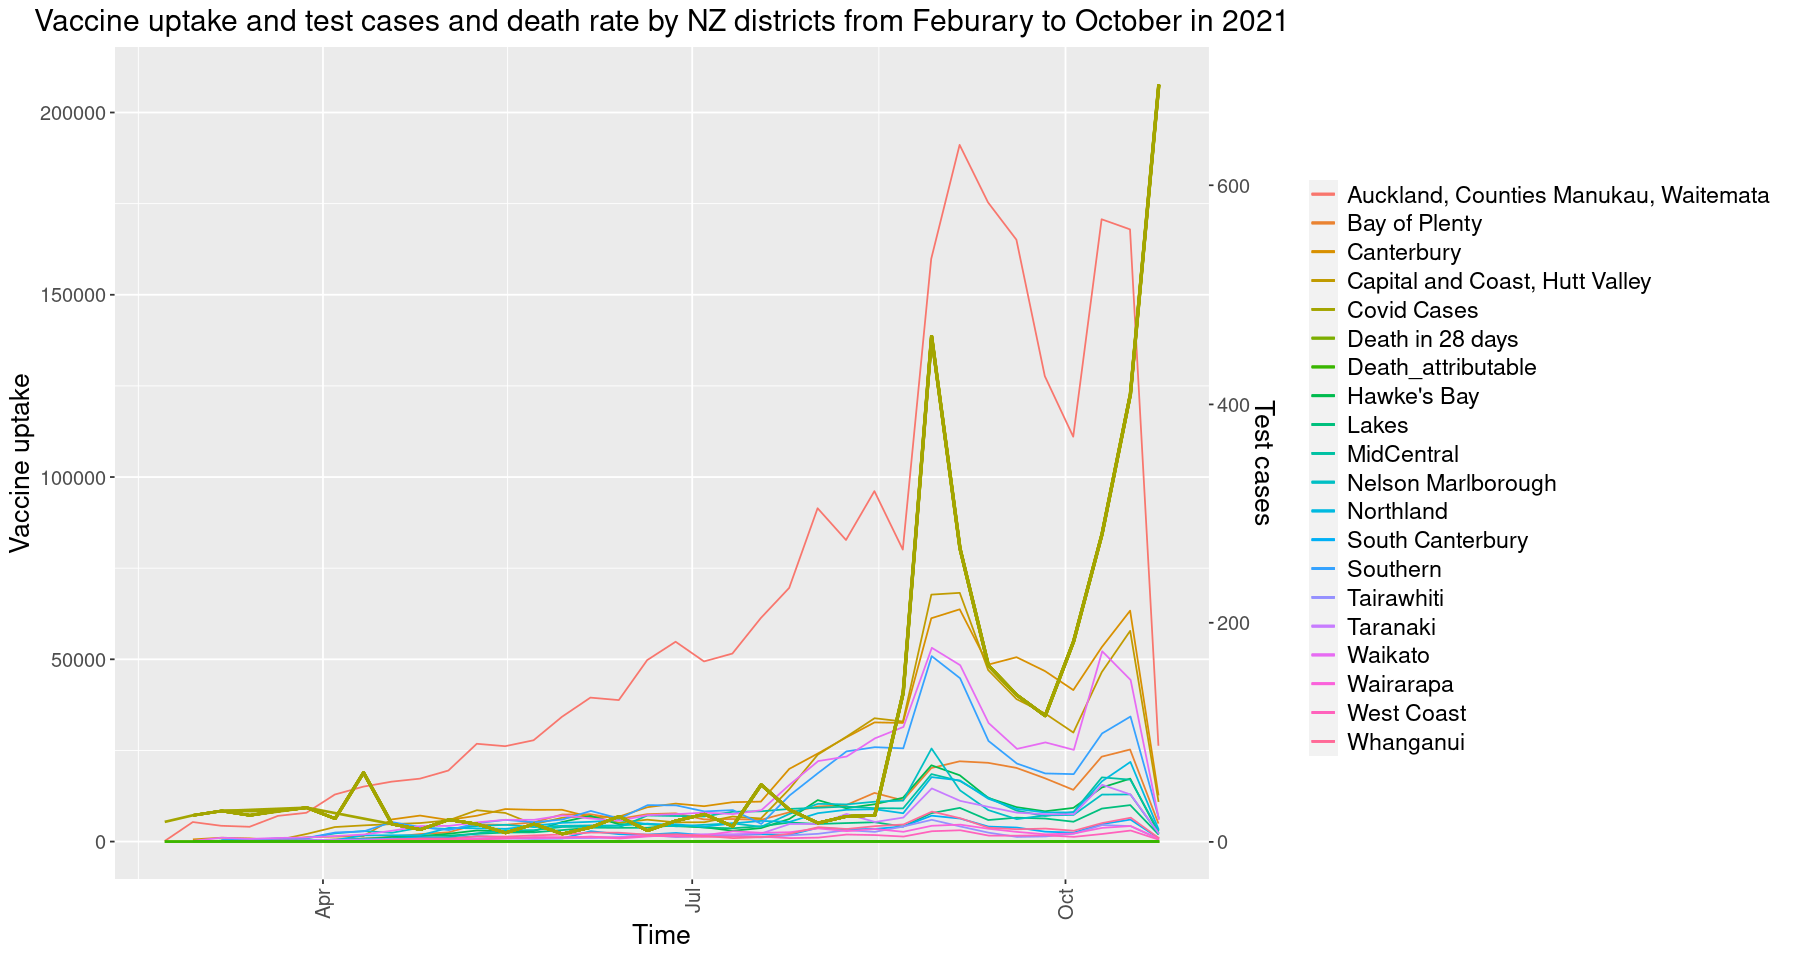

In [19]:
vac_tes_death_table_graph <- vac_tes_death_table %>% 
        # filter(all_districts == "Auckland, Counties Manukau, Waitemata") %>%
        ggplot(aes(x=weekly_date, color=all_districts, group=all_districts)) + 
        ggtitle('Vaccine uptake and test cases and death rate by NZ districts from Feburary to October in 2021') + 
        geom_line(aes(y=total_uptake_number, color=all_districts), position = position_dodge(0.2)) +
        # geom_point(aes(y=total_uptake_number), position = position_dodge(0.2), size=2) +
        geom_line(aes(y=weekly_total_cases*300, color ='Covid Cases'), position = position_dodge(0.2), size = 0.75) +
        # geom_point(aes(y=WeeklyCases), position = position_dodge(0.2), size=2) +
        geom_line(aes(y=death_in_28_days, color ='Death in 28 days'), position = position_dodge(0.2), size = 0.75) +
        geom_line(aes(y=death_attributable, color ='Death_attributable'), position = position_dodge(0.2), size = 0.75) +
        # geom_text(aes(label=total_uptake_number), position=position_dodge(width=0.9), vjust=-0.75) +
        theme(plot.title = element_text(hjust = 0.5, size=18), 
              axis.title=element_text(size=16), 
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size=12),
              axis.text.y = element_text(size=12),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) +
            scale_y_continuous(
                name = "Vaccine uptake",
                sec.axis = sec_axis(~./300, name="Test cases")) + 
        xlab("Time")
vac_tes_death_table_graph

In [20]:
ggsave(filename = "Vaccine uptake and test cases and death rate by NZ districts from Feburary to October in 2021.png", vac_tes_death_table_graph)

Saving 6.67 x 6.67 in image



In [21]:
nz1 <- readRDS("../Data/gadm36_NZL_1_sp.rds")

In [22]:
# modify vaccine rate location to match spatial dataframe
vac_tes_death_table

weekly_date,total_uptake_number,all_districts,weekly_total_cases,death_in_28_days,death_attributable
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2021-02-21,162,"Auckland, Counties Manukau, Waitemata",18,0,0
2021-02-28,5354,"Auckland, Counties Manukau, Waitemata",24,0,0
2021-02-28,599,Canterbury,24,0,0
2021-02-28,180,"Capital and Coast, Hutt Valley",24,0,0
2021-02-28,72,Lakes,24,0,0
2021-02-28,18,Northland,24,0,0
2021-02-28,79,Tairawhiti,24,0,0
2021-02-28,218,Waikato,24,0,0
2021-02-28,26,Hawke's Bay,24,0,0


In [ ]:
nz1$NAME_2 <- as.factor(nz1$NAME_1)
nz1$fake.data <- runif(length(nz1$NAME_1)) 
spplot(nz1,
        "NAME_2", 
         sp.layout=list("sp.points", nz1$NAME_1, col="red"),
         xlim=c(163,180), 
         scales=list(draw=T), 
         ylim=c(-50,-32), 
         col.regions=rgb(nz1$fake.data, 1-nz1$fake.data, 0), 
         colorkey=F)
nz1 %>% glimpse()